In [7]:
import pandas as pd
from sklearn import tree
from sklearn import metrics
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.cross_validation import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function

In [210]:
df_match = pd.read_csv('dataset.csv')
all_match_attributes=df_match.columns.values.tolist()
after_match_attributes =['home_team_goal', 'away_team_goal', 'possession_home', 'shoton_home', 'shoton_away', 
                      'shotoff_home', 'shotoff_away', 'corner_home', 'corner_away', 'cross_home', 'cross_away', 
                      'foulcommit_home', 'foulcommit_away', 'rcard_home', 'rcard_away', 'ycard_home', 'ycard_away', 
                      'throwin_home', 'throwin_away']
before_match_attributes = list(set(all_match_attributes) - set(after_match_attributes))
before_match_all=before_match_attributes+['possession_home']
df_before_match = df_match[before_match_all]

In [9]:
holdout_per=0.2
df_before_match_out_sample = df_before_match.sample(frac=holdout_per)
df_before_match_out_testtarget = df_before_match_out_sample['possession_home']
df_before_match_out_test =df_before_match_out_sample[before_match_attributes]

df_before_match_out_left = df_before_match.iloc[list(set(df_before_match.index.values.tolist())-set(df_before_match_out_sample.index.values.tolist()))]
df_before_match_out_training = df_before_match_out_left[before_match_attributes]
df_before_match_out_trainingtarget = df_before_match_out_left['possession_home']

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.4s finished

[2017-11-07 15:23:32] Features: 1/41 -- score: -57.7733043545[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished

[2017-11-07 15:23:32] Features: 2/41 -- score: -52.109392635[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.5s finished

[2017-11-07 15:23:33] Features: 3/41 -- score: -51.2464511379[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.5s finished

[2017-11-07 15:23:33] Features: 4/41 -- score: -50.3731439853[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.6s finished

[2

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished

[2017-11-07 15:23:51] Features: 40/41 -- score: -51.2771107113[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished

[2017-11-07 15:23:51] Features: 41/41 -- score: -51.6970964167

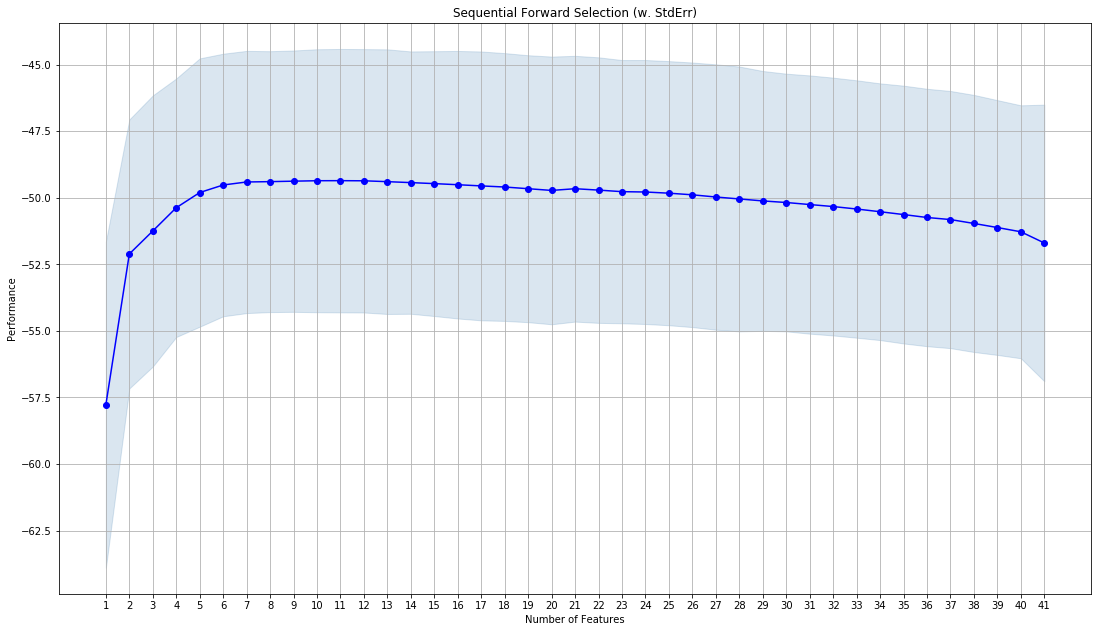

In [10]:
lr = linear_model.LinearRegression()
sfs_greedy = SFS(lr, 
           k_features=df_before_match_out_training.shape[1], 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=10)
sfs_greedy = sfs_greedy.fit(df_before_match_out_training.as_matrix(), df_before_match_out_trainingtarget.as_matrix())
fig = plot_sfs(sfs_greedy.get_metric_dict(), kind='std_err')
fig.set_size_inches(18.5, 10.5, forward=True)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [11]:
df_features_forward_greedy = pd.DataFrame.from_dict(sfs_greedy.get_metric_dict()).T
df_features_forward_greedy

,avg_score,ci_bound,cv_scores,feature_idx,std_dev,std_err
1,-57.7733,13.6507,"[-39.9627638499, -33.689304451, -39.3575414342...","(7,)",18.3795,6.12648
2,-52.1094,11.2551,"[-37.4292900283, -34.503731683, -36.8100962047...","(8, 7)",15.1541,5.05135
3,-51.2465,11.3439,"[-34.5902918247, -33.4187525409, -36.997950756...","(8, 26, 7)",15.2736,5.09121
4,-50.3731,10.8192,"[-37.4472532905, -35.0273754021, -35.386150183...","(8, 26, 22, 7)",14.5671,4.85569
5,-49.8028,11.2272,"[-37.9222662414, -34.2643802399, -33.678350259...","(7, 8, 12, 22, 26)",15.1165,5.03883
6,-49.5193,10.9878,"[-36.9434064851, -34.1053426643, -34.031635718...","(36, 7, 8, 12, 22, 26)",14.7941,4.93137
7,-49.4063,10.9716,"[-36.2488267885, -33.5527962552, -34.087465288...","(36, 7, 8, 12, 22, 26, 31)",14.7723,4.9241
8,-49.3934,10.9176,"[-36.1918392101, -33.2949991562, -33.978359688...","(2, 36, 7, 8, 12, 22, 26, 31)",14.6996,4.89988
9,-49.3758,10.9363,"[-36.0632195442, -33.2828956022, -33.919856563...","(2, 7, 8, 12, 17, 22, 26, 31, 36)",14.7248,4.90827
10,-49.3591,11.0052,"[-35.8004305304, -33.3734716523, -34.142337508...","(2, 7, 8, 12, 17, 20, 22, 26, 31, 36)",14.8176,4.93919


#### simple greedy solution: 


In [12]:
greedy_selected_columns_index=list()

selected_column_indice=df_features_forward_greedy[df_features_forward_greedy['avg_score'] == df_features_forward_greedy['avg_score'].max()]['feature_idx']
greedy_selected_columns_index=selected_column_indice.tolist()
greedy_selected_colname_list = df_before_match_out_training.columns[greedy_selected_columns_index].tolist()
print("Selected columns by simple greedy sequential forward selection are: \n",greedy_selected_colname_list)

Selected columns by simple greedy sequential forward selection are: 
 ['buildUpPlaySpeed_away', 'B365A', 'IWH', 'WHA', 'buildUpPlayPassing_home', 'buildUpPlaySpeed_home', 'buildUpPlayDribbling_home', 'buildUpPlayPassing_away', 'defencePressure_home', 'defenceTeamWidth_away', 'defenceAggression_away']


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.4s finished

[2017-11-07 15:23:52] Features: 1/41 -- score: -57.7733043545[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2017-11-07 15:23:52] Features: 2/41 -- score: -52.109392635[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2017-11-07 15:23:52] Features: 3/41 -- score: -51.2464511379[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s rema

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.0s finished

[2017-11-07 15:24:11] Features: 21/41 -- score: -49.559874124[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.7s finished

[2017-11-07 15:24:12] Features: 21/41 -- score: -49.4814831262[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.8s finished

[2017-11-07 15:24:14] Features: 22/41 -- score: -49.53

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    2.6s finished

[2017-11-07 15:24:55] Features: 40/41 -- score: -51.2771107113[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.4s finished

[2017-11-07 15:24:58] Features: 41/41 -- score: -51.6970964167

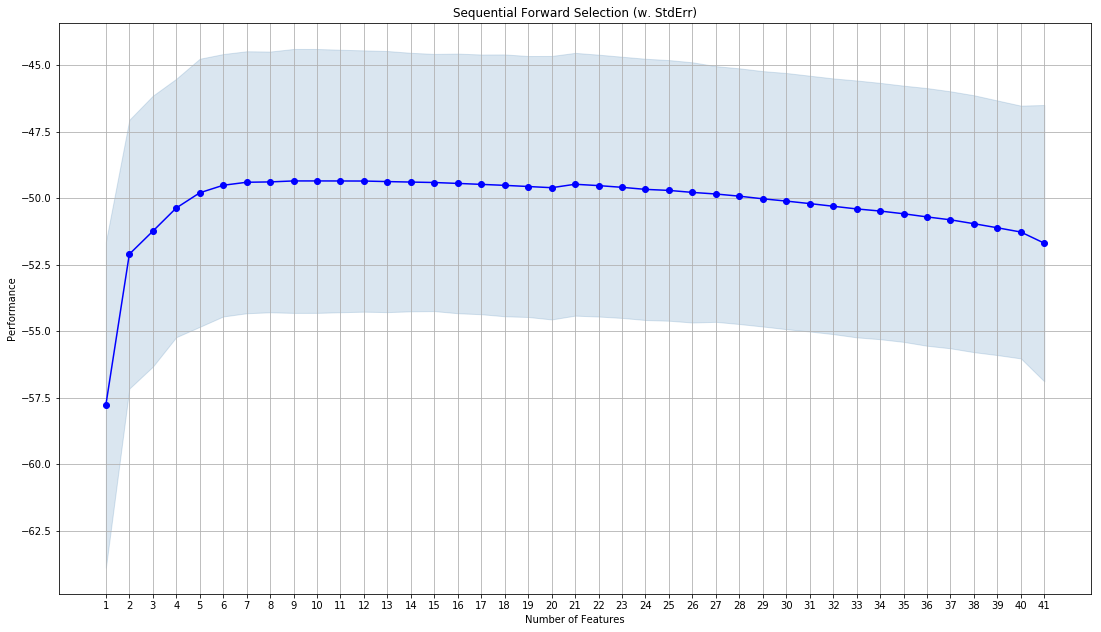

In [13]:
lr = linear_model.LinearRegression()
sfs_float = SFS(lr, 
           k_features=df_before_match_out_training.shape[1], 
           forward=True, 
           floating=True, 
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=10)
sfs_float = sfs_float.fit(df_before_match_out_training.as_matrix(), df_before_match_out_trainingtarget.as_matrix())
fig = plot_sfs(sfs_float.get_metric_dict(), kind='std_err')
fig.set_size_inches(18.5, 10.5, forward=True)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [14]:
df_features_forward_float = pd.DataFrame.from_dict(sfs_float.get_metric_dict()).T
df_features_forward_float

,avg_score,ci_bound,cv_scores,feature_idx,std_dev,std_err
1,-57.7733,13.6507,"[-39.9627638499, -33.689304451, -39.3575414342...","(7,)",18.3795,6.12648
2,-52.1094,11.2551,"[-37.4292900283, -34.503731683, -36.8100962047...","(8, 7)",15.1541,5.05135
3,-51.2465,11.3439,"[-34.5902918247, -33.4187525409, -36.997950756...","(8, 26, 7)",15.2736,5.09121
4,-50.3731,10.8192,"[-37.4472532905, -35.0273754021, -35.386150183...","(8, 26, 22, 7)",14.5671,4.85569
5,-49.8028,11.2272,"[-37.9222662414, -34.2643802399, -33.678350259...","(7, 8, 12, 22, 26)",15.1165,5.03883
6,-49.5193,10.9878,"[-36.9434064851, -34.1053426643, -34.031635718...","(36, 7, 8, 12, 22, 26)",14.7941,4.93137
7,-49.4063,10.9716,"[-36.2488267885, -33.5527962552, -34.087465288...","(36, 7, 8, 12, 22, 26, 31)",14.7723,4.9241
8,-49.3934,10.9176,"[-36.1918392101, -33.2949991562, -33.978359688...","(2, 36, 7, 8, 12, 22, 26, 31)",14.6996,4.89988
9,-49.3564,11.0525,"[-35.9151608375, -33.6456936761, -34.276511503...","(7, 8, 12, 17, 20, 22, 26, 31, 36)",14.8813,4.96042
10,-49.3564,11.0512,"[-35.8950648683, -33.6313224931, -34.308020199...","(7, 8, 12, 17, 20, 22, 26, 31, 32, 36)",14.8795,4.95982


#### float solution: 

In [15]:
float_selected_columns_index=list()

selected_column_indice=df_features_forward_float[df_features_forward_float['avg_score'] == df_features_forward_float['avg_score'].max()]['feature_idx']
float_selected_columns_index=selected_column_indice.tolist()
float_selected_colname_list = df_before_match_out_training.columns[float_selected_columns_index].tolist()
print("Selected columns by float greedy sequential forward selection are: \n",float_selected_colname_list)

Selected columns by float greedy sequential forward selection are: 
 ['IWH', 'WHA', 'buildUpPlayPassing_home', 'buildUpPlaySpeed_home', 'buildUpPlayDribbling_home', 'buildUpPlayPassing_away', 'defencePressure_home', 'defenceTeamWidth_away', 'stage', 'defenceAggression_away']


## Use the selected columns from both simple greedy and float greedy to use on the outter layer holdout validation

#### 1. Simple Greedy

In [16]:
df_before_match_greedy_training=df_before_match_out_training[greedy_selected_colname_list]
df_before_match_greedy_test=df_before_match_out_test[greedy_selected_colname_list]

lr_greedy = linear_model.LinearRegression()
lr_greedy.fit(df_before_match_greedy_training.as_matrix(), df_before_match_out_trainingtarget.as_matrix())
before_match_greedy_pred = lr_greedy.predict(df_before_match_greedy_test.as_matrix())


print(r2_score(df_before_match_out_testtarget.tolist(), before_match_greedy_pred.tolist()))


0.362235887377


In [17]:
df_before_match_float_training=df_before_match_out_training[float_selected_colname_list]
df_before_match_float_test=df_before_match_out_test[float_selected_colname_list]

lr_greedy = linear_model.LinearRegression()
lr_greedy.fit(df_before_match_float_training.as_matrix(), df_before_match_out_trainingtarget.as_matrix())
before_match_float_pred = lr_greedy.predict(df_before_match_float_test.as_matrix())


print(r2_score(df_before_match_out_testtarget.tolist(), before_match_float_pred.tolist()))

0.358944902582


## ANN

In [47]:
df_before_match.head()

,LBH,chanceCreationCrossing_home,buildUpPlaySpeed_away,LBA,buildUpPlayPositioningClass_home_isOrganised,buildUpPlayDribbling_away,B365A,IWH,WHA,chanceCreationShooting_home,...,stage,LBD,BWD,BWA,defenceAggression_away,IWD,VCH,buildUpPlayPositioningClass_away_isOrganised,WHD,possession_home
0,1.80,70,60,3.75,True,32.0,4.33,1.80,3.75,70,...,2,3.30,3.60,4.00,70,3.40,1.95,True,3.30,57
1,3.30,70,70,2.20,True,32.0,2.10,3.20,2.15,50,...,21,3.25,3.30,2.05,70,3.20,3.60,True,3.25,57
2,1.80,70,70,3.75,True,32.0,4.50,1.75,4.33,50,...,21,3.30,3.60,4.50,70,3.50,1.80,True,3.30,60
3,2.38,70,65,2.60,True,32.0,2.88,2.40,2.60,70,...,21,3.20,3.20,2.75,70,3.20,2.50,True,3.10,51
4,2.10,70,55,3.00,True,32.0,3.75,2.10,3.20,55,...,21,3.20,3.25,3.65,70,3.25,2.10,True,3.20,53


In [211]:
print(before_match_attributes)

['LBH', 'chanceCreationCrossing_home', 'buildUpPlaySpeed_away', 'LBA', 'buildUpPlayPositioningClass_home_isOrganised', 'buildUpPlayDribbling_away', 'B365A', 'IWH', 'WHA', 'chanceCreationShooting_home', 'BWH', 'chanceCreationPositioningClass_away_isOrganised', 'buildUpPlayPassing_home', 'chanceCreationPassing_home', 'B365D', 'defenceAggression_home', 'IWA', 'buildUpPlaySpeed_home', 'B365H', 'defenceTeamWidth_home', 'buildUpPlayDribbling_home', 'chanceCreationPositioningClass_home_isOrganised', 'buildUpPlayPassing_away', 'chanceCreationCrossing_away', 'chanceCreationShooting_away', 'WHH', 'defencePressure_home', 'VCD', 'VCA', 'chanceCreationPassing_away', 'defencePressure_away', 'defenceTeamWidth_away', 'stage', 'LBD', 'BWD', 'BWA', 'defenceAggression_away', 'IWD', 'VCH', 'buildUpPlayPositioningClass_away_isOrganised', 'WHD']


In [209]:
#before_match_attributes = ['LBH']

In [324]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

df = df_before_match

train_df, test_df = train_test_split(df, test_size=0.2)

trainX = train_df[before_match_attributes]
trainY = train_df['possession_home']

testX = test_df[before_match_attributes]
testY = test_df['possession_home']

fnn = MLPRegressor(solver='adam', alpha=1e-3,
                    hidden_layer_sizes=(256,128,64,32,),
                    random_state=1,
                    nesterovs_momentum=True,
                    momentum=0.99,
                    early_stopping=False,
                    activation='logistic',
                    batch_size=32,
                    warm_start=False,
                  max_iter=3000)

model = fnn.fit(trainX, trainY)                         


In [325]:
print(model)
print(model.loss_curve_)
print(model.n_layers_)

MLPRegressor(activation='logistic', alpha=0.001, batch_size=32, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(256, 128, 64, 32), learning_rate='constant',
       learning_rate_init=0.001, max_iter=3000, momentum=0.99,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
[1289.6103572927377, 1193.2399413327485, 1128.5362859195343, 1066.7001171448235, 1010.7906912159925, 955.05131630900041, 898.77145218341695, 847.650357634324, 799.79363173513968, 754.60675451173961, 711.77440307572533, 671.07891951304384, 632.40782231231003, 595.64509275788862, 560.66391745582143, 527.43947948373534, 495.82063557546644, 465.85016013001228, 437.05054013336576, 403.79248760621272, 373.3740646101096, 346.34018562246797, 321.60104354500038, 298.68058910291745, 277.40078463896856, 257.6115573453614, 239.19982508419943, 222.04191639636508, 

In [327]:
model.predict(testX) - testY

1831     5.031024
460     -5.452020
1555    -2.400380
88      -3.925505
648     -7.176481
335     -0.266801
478     -7.381075
2354     0.764792
981      1.731510
1646     3.013610
1604    -6.241925
1742    -0.223895
447     -6.227484
1503    -3.088946
1909    12.596883
337      2.573130
867      2.747711
1049    -0.813042
1796   -10.068200
995      0.513368
2197    -6.446574
1630   -13.422753
1605    -9.527143
1333    -2.905930
1260    10.832606
1247    -2.723763
751     -6.058250
70      -2.742580
1184     2.844940
1344    -9.284535
          ...    
1749     7.912419
2057    -5.053377
2333   -12.207060
1789    -7.667959
761      0.313212
2038    -4.587278
1561    -5.304895
1459    -9.770478
1091     3.878841
339      7.583421
1106    10.541686
897      7.740358
823     -0.583285
433      0.512958
1958   -13.405823
79      -7.223743
187      8.003316
2288    -6.388906
237     -4.670353
2184    -8.774572
1194    -1.938315
2009     2.747143
692     -2.127519
1455    -6.632621
750     -6

In [334]:
print("Predicted: " + str(model.predict(X.iloc[1909].values.reshape(1, -1))) + ", actual: " + str(y[1909]))

print("Predicted: " + str(model.predict(X.iloc[123].values.reshape(1, -1))) + ", actual: " + str(y[123]))

print("Predicted: " + str(model.predict(X.iloc[1312].values.reshape(1, -1))) + ", actual: " + str(y[1312]))

print("Predicted: " + str(model.predict(X.iloc[654].values.reshape(1, -1))) + ", actual: " + str(y[654]))


Predicted: [ 58.5968829], actual: 46
Predicted: [ 49.00280523], actual: 56
Predicted: [ 41.597128], actual: 41
Predicted: [ 42.75024425], actual: 40
